# Random Walks en Alianzas de Aerolíneas

## Directorio

In [56]:
#Establecer directorio
cd("$(homedir())/Documents/UNAM/Tesis_Lic")

## Paquetes

Se importan todos los paquetes que se necesitarán para las funciones y visualizaciones del proyecto.

In [1]:
#Para usar sample
using StatsBase

In [2]:
#Para cargar matrices de adyacencia
using DelimitedFiles

In [4]:
#Para poner una semilla en sample
using RandomNumbers.Xorshifts

In [3]:
#Para graficar
using Plots

In [4]:
pyplot()

Plots.PyPlotBackend()

In [ ]:
#No cargar
using Plotly

In [ ]:
using FreqTables

In [ ]:
using StatsPlots

In [ ]:
using RandomNumbers

In [ ]:
using Gadfly

## Funciones

### Importar datos

In [55]:
"""
    import_matrix(file::string)

Función que importa el archivo de la matriz de adyacencia de R.
"""
function import_matrix(arch::AbstractString)
    archivo_R = readdlm(arch, ',') 
    archivo_R = archivo_R[2:end, :]
    matriz = archivo_R[:, 2:end]
    nombre = convert(Array{Int64,2}, matriz)
    return nombre
end

import_matrix

### Nombres de datos

In [7]:
"""
    data_names(M)

Función que obtiene un arreglo con los nombres de aeropuertos de la matriz
"""
function data_names(arch::AbstractString)
    archivo_R = readdlm(arch, ',')
    columna = archivo_R[1, :]
    nombres = columna[2:end]
    return nombres
end

data_names

### Grado

In [8]:
"""

    n_in_degree(M::Array{Int64,2}, n::Int64)

Función que obtiene el grado de entrada de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
n nodo a evaluar de tipo Int64

Resultado:
Grado de entrada del nodo n representado por un valor numérico de tipo Int64

Implementación

#### Ejemplos
"""
function n_in_degree(M::Array{Int64,2}, n::Int64)
    grado_entrada = sum(M[n, :])
end

n_in_degree

In [12]:
"""
    in_degree(M)

Función que obtiene el grado de entrada de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de entrada de todos los nodos n de la red.

## Implementación

### Ejemplos
"""
function in_degree(M::Array)
    nombre = "in_degree"
    grados_entrada = sum(M, dims = 2)
    writedlm("in_degree_.txt", grados_entrada)
end

in_degree

In [13]:
mat = [0 1 1
       1 0 0
       0 0 0]

3×3 Array{Int64,2}:
 0  1  1
 1  0  0
 0  0  0

In [14]:
in_degree(mat)

In [10]:
"""
    n_out_degree(M, n)

Función que obtiene el grado de salida de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de salida del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""
function n_out_degree(M::Array{Int64,2}, n::Int64)
    grado_salida = sum(M[:, n])
end

n_out_degree

In [11]:
"""
    out_degree(M)

Función que obtiene el grado de salida de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de salida de todos los nodos n de la red.

## Implementación

### Ejemplos
"""
function out_degree(M::Array)
    grados_salida = sum(M, dims = 1)
end

out_degree

In [ ]:
"""
    degree(M)

Función que obtiene el grado de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve el grado de la red, el cual es representado por un valor numérico de tipo Float64

## Implementación

### Ejemplos
"""
function degree(M::Array)
    
    grado_entrada = degree_in(M)
    
    grado_red = sum(grado_entrada) / length(grado_entrada) #Grado de la red, promedio de los grados
end

### Distribución de grado

In [11]:
"""
Función de distribución de grado de entrada
"""
function distrib_in_degree(M::Array)
    x = in_degree(M)
    degree_count = counts(x)
    return degree_count
end

distrib_in_degree (generic function with 1 method)

In [12]:
"""
Función de distribución de grado de salida
"""
function distrib_out_degree(M::Array)
    x = out_degree(M)
    degree_count = counts(x)
    return degree_count
end

distrib_out_degree (generic function with 1 method)

In [13]:
"""
Función de distribución
"""
function distrib_degree(M::Array)
    x = degree(M)
    distribucion = Int64[]
    
    for i in 1:length(x)
        degree_count = count(x == i, x)
        push!(distribucion, degree_count)
    end
    distribucion
end

distrib_degree (generic function with 1 method)

In [ ]:
#Hacer una función analize_distribution que nos dé el diccionario de frecuencias 
function analize_distribution(M::array, t)
    if x = 
    countmap()
end

In [14]:
function plot_distrib(M::Array, tipo::String, titulo::String, color::String)
    
    pyplot()
    
    if tipo == "in"
        distribucion = distrib_in_degree(M::Array)
    elseif tipo == "out"
        distribucion = distrib_out_degree(M::Array)
    end
    distribucion
    #@show distribucion
    graph = bar(distribucion, fillcolor = color, markersize = 3, linealpha = 0.5, 
    title = titulo, 
    xlabel = "Grado", 
    ylabel = "Frecuencia",
    xlims = (-10,300), #obtener límites
    ylims = (-10,1000)) #obtener límites
end

plot_distrib (generic function with 1 method)

### Vecinos

In [32]:
"""
    vecinos(M::Array{Int64,2})

Función que obtiene un conjunto de arreglos con los vecinos de cada nodo.
"""
function vecinos(M::Array{Int64,2})
    
    nodos = size(M, 1) #aeropuertos
    vecindades = []
    
    for i in 1:nodos
        vecinos = findall(x -> x != 0, M[i, :])
        push!(vecindades, vecinos)
    end
    vecindades
end

vecinos (generic function with 1 method)

### Random walks

In [33]:
"""

    r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)

La función r_walks tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
f, nodo inicial de tipo Int64
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz, el cual tiene igual probabilidad de avanzar 
hacia cualquiera de sus vecinos.
Regresa un arreglo que contiene todas las trayectorias que tomó el caminante aleatorio.
"""
function r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)
    
    #nodos = size(M, 1) #aeropuertos  
    paths = zeros(Int64, (iter, steps + 1))
    s = f
    seed = 1
    vecindades = vecinos(M)

    for i in 1:iter
        paths[i, 1] = f
        
        for p in 1:steps 
            #row = M[s, :] #Renglón correspondiente al nodo s
            vecindad = vecindades[s]
            #vecinos = findall(x -> x != 0, row)
            
            if vecindad == []
                break
            else
                a = sample(Xoroshiro128Plus(seed), vecindad) 
                paths[i, p + 1] = a
                s = a
                seed += 1
            end
            
        end
        s = f
        
    end
    
    return paths 
end

r_walks

In [34]:
"""

    random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64)

La función random_walk tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz con igual probabilidad de avanzar 
hacia cualquiera de sus vecinos. Esta función recorre todos los nodos de la red como
nodos iniciales y sobre ellos itera para obtener el número de caminos que se le pidió.
Regresa un arreglo que contiene arreglos asociados a todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""
function random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64) 
    
    random_walks = []
    nodos = size(M, 1)
    
    for f in 1:nodos #aeropuertos
        paths = r_walks(M, f, steps, iter)
        push!(random_walks, paths)
    end
    
    random_walks
end

random_walk

### Longitud de caminatas

In [35]:
"""
    walk_length(W)
La función walk_length tiene como parámetros:
RW, arreglo de arreglos de tipo Array{Any,1} que corresponde al arreglo de caminatas aleatorias.
La función regresa un arreglo de arreglos que contiene las longitudes de todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""
function walk_length(W)
    
    longitudes = Array[]
    c = 0
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v
        #@show i
        for j in 1:s
            #@show j
            for k in 1:t
                #@show k
                
                if W[i][j, :][k] != 0 #W[i][j, :] #renglón a analizar
                    c += 1 
                else
                    break
                end
                
            end
            
            longz[j] = c - 1
            c = 0
            
        end
        
        push!(longitudes, longz)
        #@show longitudes
        longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    end
    return longitudes
end

walk_length

In [36]:
"""
La función walk_av_length tiene como parámetro W, que es un arreglo de arreglos (que se puede obtener de la 
función walk_length). 
Regresa un arreglo con entradas correspondientes al promedio de las longitudes de 
las caminatas aleatorias para cada nodo de inicio antes de caer en un nodo con grado de salida 0.
"""
function walk_av_length(W)
    
    proms = []
    wlength = walk_length(W)
    
    for i in 1:length(wlength)
        av = mean(wlength[i])
        push!(proms, av)
    end
    
    proms
end

walk_av_length

In [37]:
"""
    walk_layer_length(W)
Función que saca el promedio de longitud de caminata en la capa
"""
function walk_layer_length(W)
    
    x = walk_av_length(W)
    av = mean(x)
    
    return av
end

walk_layer_length

### Nodos/aeropuertos visitados

In [38]:
"""
    nodos_visitados(W)
La función caminos tiene como parámetro W que es un arreglo de arreglos.
Regresa los nodos diferentes a los que llega el caminante.
"""
function nodos_visitados(W)
    
    cobert = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos, no necesario
    #visit = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    visit = []
    
    for i in 1:v        
        for j in 1:s
            u = unique(W[i][j, :])
            push!(visit, u)
        end
        
        push!(cobert, visit)
        visit = []
    end
    
    return cobert
end

nodos_visitados

In [ ]:
#Hacer una función que te muestre el nombre de los aeropuertos diferentes que visita
function aeropuertos_visitados(W)
    
    nodos_visit = nodos_visitados(W)
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos, no necesario
    aeropuertos = []
    
    for i in 1:v
        for j in 1:s
            
        
end

### Frecuencia de visitas

In [39]:
"""
    freq_visitas_nodos(W::Array)

Función que hace un diccionario con frecuencias de visitas
"""
function freq_visitas_nodos(W::Array)
    
    dicc = [] #arreglo vacío
    
    nodos = length(W) #tamaño de caminatas
    iter = size(W[1], 1) #núm de iteraciones
    diccionario = 0
    
    #for i = n
    for i in 1:nodos #corro por todos los nodos
        for j in 1:iter #corro por las iteraciones
            diccionario = countmap(W[i][j, :]) #hago diccionario de freqs de cada caminata
            push!(dicc, diccionario) #guardo el diccionario en un arreglo vacío
        end
        
        diccionario = 0
    end
    return dicc
end

freq_visitas_nodos (generic function with 1 method)

In [40]:
"""
    distrib_visitas_nodos(W)

Función que crea un arreglo de arreglos con la distribución de frecuencia de visitas
"""
function distrib_visitas_nodos(W)
    
    x = freq_visitas_nodos(W) #diccionario de frecuencias
    l = length(W)
    f = 0
    frec_total = [] #zeros(Array, length(x)) #arreglo de ceros de tamaño núm dicc
    frec_nodo = zeros(Int64, l+1) #arreglo de nodos de tamaño núm nodos para get frec

    for i in 1:length(x) #corro por los nodos

        for j in 1:l+1 #corro por los nodos

            frec_nodo[j] = get(x[i], f, 0) #entrada j de freq nodo la cambio por la entrada j del dicc i
            f += 1
        end
        push!(frec_total, frec_nodo)
        
        f = 0
        frec_nodo = zeros(Int64, l+1)
        
    end
    
    return frec_total
end

distrib_visitas_nodos (generic function with 1 method)

In [41]:
"""
    plot_visit_freq(W)

Función que hace un heatmap de nodos en los que cae, cada renglón corresponde a una caminata
"""
function plot_visit_freq(W)
    
    pyplot()
    x = distrib_visitas_nodos(W)
    h = transpose(hcat(x...))

    xs = [string("n", i) for i = 0:1:length(W)]
    ys = [string("rw", i) for i = 1:length(x)]
    z = h
    heatmap(xs, ys, z, aspect_ratio=1)
end

plot_visit_freq (generic function with 1 method)

In [42]:
"""
    freq_visitas_nodo(W::Array, n)

Función que hace un diccionario con frecuencias para un nodo inicial
"""
function freq_visitas_nodo(W::Array, n)
    
    dicc = [] #arreglo vacío
    
    nodos = length(W) #tamaño de caminatas
    iter = size(W[1], 1) #núm de iteraciones
    diccionario = 0
    
    for j in 1:iter #corro por las iteraciones
          
        diccionario = countmap(W[n][j, :]) #hago diccionario de freqs de cada caminata
          
        push!(dicc, diccionario) #guardo el diccionario en un arreglo vacío
          
    end
    
    return dicc
end

freq_visitas_nodo (generic function with 1 method)

In [43]:
"""
    distrib_visitas_nodo(W, n)

Función que crea un arreglo de arreglos con la distribución de frecuencias de visitas de un nodo inicial
"""
function distrib_visitas_nodo(W, n)
    
    x = freq_visitas_nodo(W, n) #diccionario de frecuencias
    l = length(W)
    f = 0
    frec_total = [] #zeros(Array, length(x)) #arreglo de ceros de tamaño núm dicc
    frec_nodo = zeros(Int64, l+1) #arreglo de nodos de tamaño núm nodos para get frec

    for i in 1:length(x) #corro por los nodos

        for j in 1:l+1 #corro por los nodos

            frec_nodo[j] = get(x[i], f, 0) #entrada j de freq nodo la cambio por la entrada j del dicc i
            
            
            f += 1
        end
        push!(frec_total, frec_nodo)
        
        f = 0
        frec_nodo = zeros(Int64, l+1)
        
    end
    
    return frec_total
end

distrib_visitas_nodo (generic function with 1 method)

In [44]:
"""
    plot_visit_freq_nodo(W, n)

Función que hace un heatmap de los nodos en los que cae, cada renglón corresponde a una caminata con cierto nodo inicial
"""
function plot_visit_freq_nodo(W, n)
    
    pyplot()
    x = distrib_visitas_nodo(W, n)
    h = transpose(hcat(x...))
    pasos = size(w[1],2)-1

    xs = [string("n", i) for i = 0:1:length(W)]
    ys = [string("rw", i) for i = 1:length(x)]
    z = h
    heatmap(xs, ys, z, aspect_ratio = 1, clims = (0, pasos))
end

plot_visit_freq_nodo (generic function with 1 method)

In [45]:
"""
    distrib_nodos_prom(W::Array)

Función que hace una distribución por nodo inicial y muestra todos los nodos iniciales
"""
function distrib_nodos_prom(W::Array)
    
    nodos = length(W) #número de nodos
    dicc = zeros(Float64, nodos, nodos+1) #arreglo ceros
    nombres = 0:1:nodos
    
    for i in 1:nodos #corro por todos los nodos
        conteos = counts(W[i]) #hago diccionario de freqs de cada caminata
        dicc[i,:] = conteos 
    end

    dicc
end

distrib_nodos_prom (generic function with 1 method)

In [46]:
"""
    plot_freq_nodos_prom(W::Array)

Función que crea un heatmap con frecuencias por nodo inicial y muestra todos
"""
function plot_freq_nodos_prom(W::Array)
    
    pyplot()
    x = distrib_nodos_prom(W)
    
    xs = [string("n", i) for i = 0:1:length(W)]
    ys = [string("rw", i) for i = 1:length(W)]
    z = x
    heatmap(xs, ys, z, aspect_ratio = 1, clims = (0, maximum(x)))
end

plot_freq_nodos_prom (generic function with 1 method)

In [ ]:
"""
Regresa los nodos que visitó y su frecuencia para cada iteración
??????????????????
"""
function frecuencia_visitas_it(W::Array)
    
    v = length(W)
    s = size(W[1], 1)
    t = size(W[1], 2)
    x = nodos_visitados(W)
    frecuencias = []
    frec = []

    for j in 1:v
        for k in 1:s
            u = counts(grado_entrada_SA[k], 1:length(grado_entrada_SA))    
            push!(frec, u)
        end
    push!(frecuencias, frec)
    end
    frecuencias
end

### Cobertura

In [47]:
"""
La función cobertura tiene como parámetro W que es un arreglo de arreglos.
Regresa el número de nodos diferentes a los que llega el caminante.
"""
function cobertura(W) 
    
    cobert = []
    
    v = length(W) #tamaño de la matriz, número de nodos
    x = nodos_visitados(W)
    s = size(x[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            l = length(x[i][j])
            longz[j] = l
        end
        push!(cobert, longz)
        longz = zeros(Int64, s)
    end
    return cobert
end


cobertura

In [48]:
"""
    n_cobertura_av(W)
Da el promedio de cobertura la caminata por nodo inicial. 
"""
function n_cobertura_av(W) #Esta es la importante
    
    longitud = []
    x = cobertura(W)
    
    for i in 1:length(x)
        l = mean(x[i])
        push!(longitud, l)
    end
    longitud
end


n_cobertura_av

In [49]:
"""
    cobertura_av(W)

Da el promedio de la longitud de las caminatas para todos los nodos, como un número.
"""
function cobertura_av(W)
    x = n_cobertura_av(W)
    promedio = mean(x)
    return promedio
end

cobertura_av

### Máximos y mínimos de longitud

In [50]:
"""
    max_length(W)
Da la longitud máxima de cada iteración de cada nodo inicial.
"""
function max_length(W)
    max = []
    x = cobertura(W)
    for i in 1:length(x)
        m = maximum(x[i])
        push!(max, m)
    end
    max
end

max_length

In [51]:
"""
    Max_length(W)
Da la longitud máxima total.
"""
function Max_length(W)
    x = max_length(W)
    m = maximum(x)
    return m
end

Max_length

In [52]:
"""
    av_max_length(W)
Regresa el promedio de la longitud máxima de cada nodo inicial.
"""
function av_max_length(W)
    x = max_length(W)
    prom = mean(x)
    return prom
end


av_max_length

In [53]:
"""
    min_length(W)
Da la longitud mínima de cada iteración de cada nodo inicial.
"""
function min_length(W)
    min = []
    x = cobertura(W)
    for i in 1:length(x)
        m = minimum(x[i])
        push!(min, m)
    end
    min
end

min_length

In [54]:
"""
    Min_length(W)
Da la longitud mínima total.
"""
function Min_length(W)
    x = min_length(W)
    m = minimum(x)
    return m
end

Min_length

In [55]:
"""
    av_min_length(W)
Regresa el promedio de la longitud mínima de cada nodo inicial.
"""
function av_min_length(W)
    x = min_length(W)
    prom = mean(x)
    return prom
end

av_min_length

### Endpoints

In [56]:
"""
    endpoints(W)

Regresa un arreglo de arreglos que contiene los nodos en los que cae cada caminata y ya no puede salir.
"""
function endpoints(W) 
    x = nodos_visitados(W)
    atractores = [] #Arreglo vacío que contenga a los atractores
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos +1
    atract = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            if x[i][j, :][end][end] == 0
                at = x[i][j, :][end][end - 1]
                atract[j] = at
            else
                atract[j] = 0
            end
        end
        push!(atractores, atract)
        atract = zeros(Int64, s)
    end
    return atractores
end

endpoints

In [140]:
"""
    av_n_endpoints(W)
Función que calcula el promedio de endpoints por nodo
"""
function av_n_endpoints(W) 
    
    x = endpoints(W)
    atractores_prom = [] #Arreglo vacío que contenga a los atractores
    v = length(W) #tamaño de la matriz, número de nodos

    for i in 1:v        
        av = mean(x[i])
        push!(atractores_prom, av)
    end
    atractores_prom
end

av_n_endpoints

### Distribución de frecuencia de endpoints

In [141]:
"""
    freq_endpoints(W)
Función que da un diccionario con frecuencias
"""
function freq_endpoints(W)
    freqs = []
    x = endpoints(W)
    v = length(W)
    
    for i in 1:v
        frec = countmap(x[i])
        push!(freqs, frec)
    end
    freqs
end

freq_endpoints

In [144]:
"""
    distrib_endpoints(W)
Función que saca la distribución de los atractores para toda la capa
"""
function distrib_endpoints(W)
    x = freq_endpoints(W)
    frec_total = zeros(Int64, length(W))
    frec_nodo = zeros(Int64, length(W))

    for i in 1:length(W)
        for j in 1:length(W)
            frec_nodo[j] = get(x[i], j, 0)
        end
        frec_total += frec_nodo
    end
    
    return frec_total
end

distrib_endpoints

In [ ]:
#plot de endpoints

### Exportar archivos

In [ ]:
#Función que exporte archivo y le asigne un nombre
writedlm( "FileName.csv",  A, ',')

In [ ]:
#Para figuras
savefig()

## Datos

### Multiplex Global

In [60]:
multiplex = importar_matriz("data/multi_17_du.csv")

3189×3189 Array{Int64,2}:
 0  0  0  1  0  0  0  1  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  1  1  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  1  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  0  1  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  1  0  1  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  0  0  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0

In [63]:
nombres_multiplex = data_names("data/multi_17_du.csv")

3189-element Array{Any,1}:
 "AER"
 "ASF"
 "CEK"
 "DME"
 "EGO"
 "GYD"
 "KGD"
 "KZN"
 "LED"
 "MRV"
 "NBC"
 "NJC"
 "NUX"
 ⋮    
 "LPS"
 "ORX"
 "BVS"
 "MTE"
 "DLZ"
 "UII"
 "ZBF"
 "CMP"
 "BSS"
 "AEX"
 "GCK"
 "MGM"

### Star Alliance

In [64]:
multiplex_SA = importar_matriz("data/multi_SA_du.csv")

934×934 Array{Int64,2}:
 0  0  1  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  1  0  0  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  1  1  1  1  0  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  1  0  0  0  1  1  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  1  0  0  1  1  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  

In [65]:
nombres_SA = data_names("data/multi_SA_du.csv")

934-element Array{Any,1}:
 "AOK"
 "ARN"
 "ATH"
 "AUH"
 "AXD"
 "BCN"
 "BEG"
 "BOD"
 "BRU"
 "BUD"
 "CAI"
 "CDG"
 "CFU"
 ⋮    
 "STL"
 "STT"
 "SYR"
 "TKK"
 "YAP"
 "HSN"
 "JUZ"
 "YIC"
 "GLF"
 "TMU"
 "GET"
 "PWM"

### OneWorld

In [66]:
multiplex_OW = importar_matriz("data/multi_OW_du.csv")

698×698 Array{Int64,2}:
 0  1  1  0  0  0  0  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  0  0  0  1  1  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  

In [67]:
nombres_OW = data_names("data/multi_OW_du.csv")

698-element Array{Any,1}:
 "EZE"
 "MIA"
 "PUJ"
 "ABE"
 "ABQ"
 "AGS"
 "ALB"
 "AMS"
 "ANC"
 "ANU"
 "ASU"
 "ATH"
 "ATL"
 ⋮    
 "CRW"
 "LEX"
 "MOB"
 "PWM"
 "TYS"
 "VPS"
 "KEM"
 "AAL"
 "SLA"
 "TUC"
 "IQT"
 "NJC"

### Sky Team

In [68]:
multiplex_ST = importar_matriz("data/multi_ST_du.csv")

900×900 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

In [69]:
nombres_ST = data_names("data/multi_ST_du.csv")

900-element Array{Any,1}:
 "AGF"
 "AJA"
 "AMS"
 "AUR"
 "BES"
 "BIA"
 "BIQ"
 "BLQ"
 "BOD"
 "BRU"
 "BVE"
 "CFE"
 "CFR"
 ⋮    
 "VCL"
 "VDH"
 "VII"
 "VKG"
 "ANR"
 "CWL"
 "DOL"
 "JER"
 "AOI"
 "PSA"
 "PWM"
 "ESB"

## Distribuciones de grado

### Multiplex Global

#### Grado de entrada

In [70]:
in_degree_multiplex = in_degree(multiplex);

In [ ]:
bar(hu, color="#0f87bf",alpha=0.4, title="Distribución Grado entrada", xlabel="Grado", ylabel="Frecuencia")

In [ ]:
histogram(hu, nb=10)

In [71]:
distrib_in_multiplex = distrib_in_degree(multiplex);

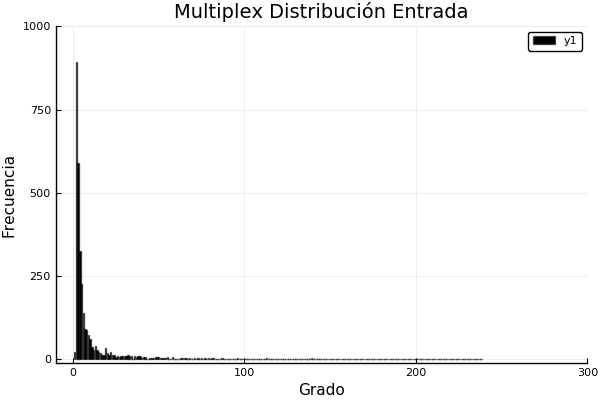

In [72]:
in_M = plot_distrib(multiplex, "in", "Multiplex Distribución Entrada", "black")

#### Grado de salida

In [73]:
out_degree_multiplex = out_degree(multiplex);

In [74]:
distrib_out_multiplex = distrib_out_degree(multiplex);

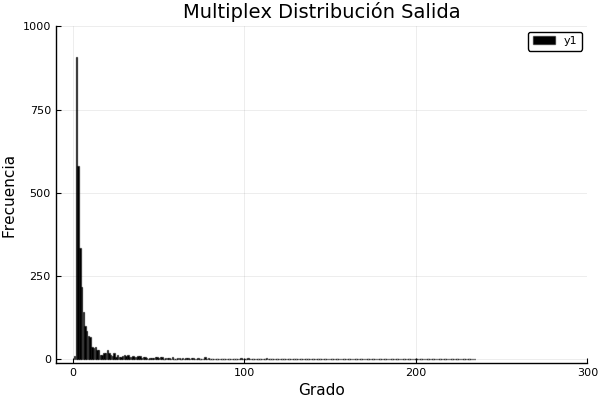

In [75]:
out_M = plot_distrib(multiplex, "out", "Multiplex Distribución Salida", "black")

### Star Alliance

#### Grado de entrada

In [76]:
in_degree_SA = in_degree(multiplex_SA);

In [77]:
distrib_in_SA = distrib_in_degree(multiplex_SA);

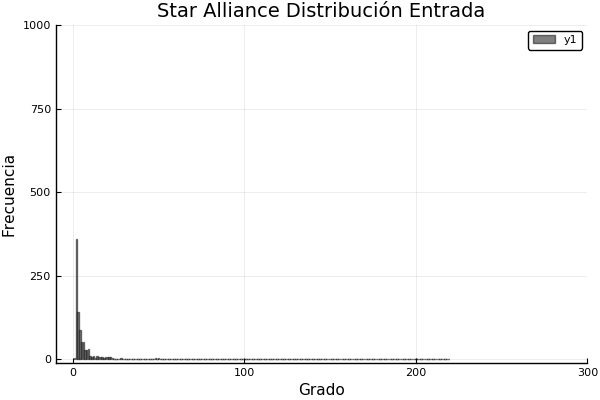

In [78]:
in_SA = plot_distrib(multiplex_SA, "in", "Star Alliance Distribución Entrada", "grey")

#### Grado de salida

In [79]:
out_degree_SA = out_degree(multiplex_SA);

In [80]:
distrib_out_SA = distrib_out_degree(multiplex_SA);

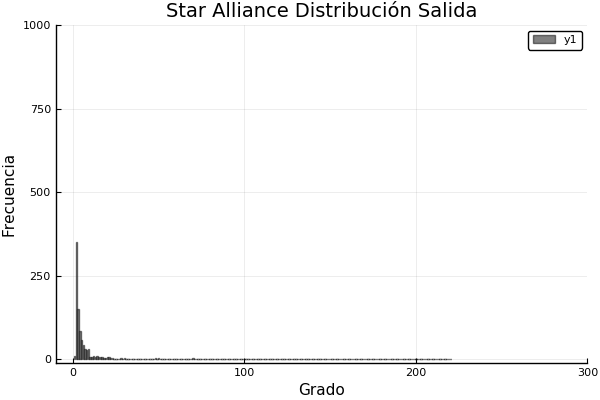

In [81]:
out_SA = plot_distrib(multiplex_SA, "out", "Star Alliance Distribución Salida", "grey")

### OneWorld

#### Grado de entrada

In [82]:
in_degree_OW = in_degree(multiplex_OW);

In [83]:
distrib_in_OW = distrib_in_degree(multiplex_OW);

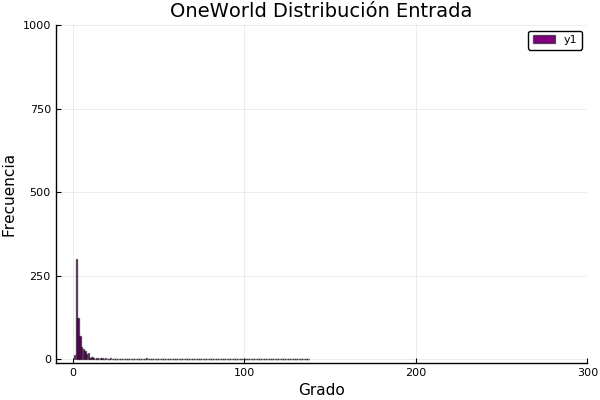

In [84]:
in_OW = plot_distrib(multiplex_OW, "in", "OneWorld Distribución Entrada", "purple")

#### Grado de Salida

In [85]:
out_degree_OW = out_degree(multiplex_OW);

In [86]:
distrib_out_OW = distrib_out_degree(multiplex_OW);

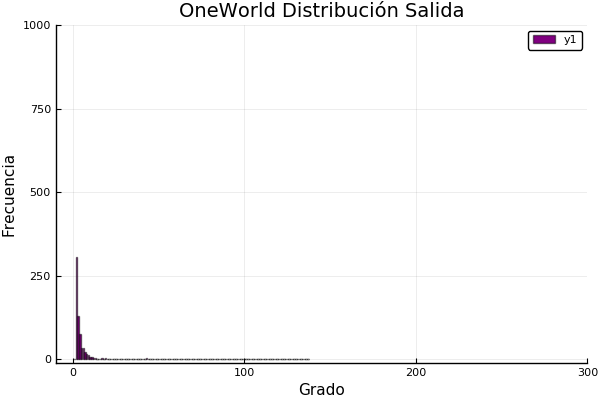

In [87]:
out_OW = plot_distrib(multiplex_OW, "out", "OneWorld Distribución Salida", "purple")

### Sky Team

#### Grado de entrada

In [88]:
in_degree_ST = in_degree(multiplex_ST);

In [89]:
distrib_in_ST = distrib_in_degree(multiplex_ST);

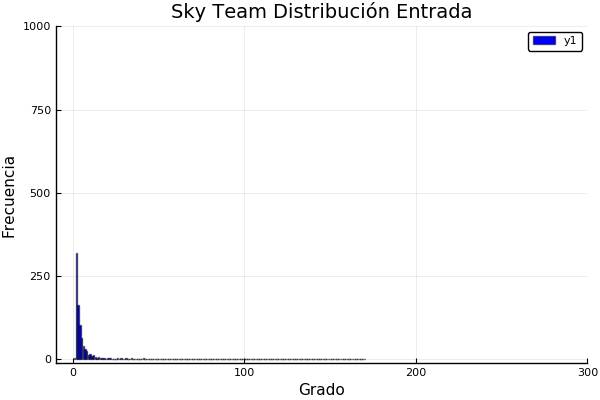

In [90]:
in_ST = plot_distrib(multiplex_ST, "in", "Sky Team Distribución Entrada", "blue")

#### Grado de salida

In [91]:
out_degree_ST = out_degree(multiplex_ST);

In [92]:
distrib_out_ST = distrib_out_degree(multiplex_ST);

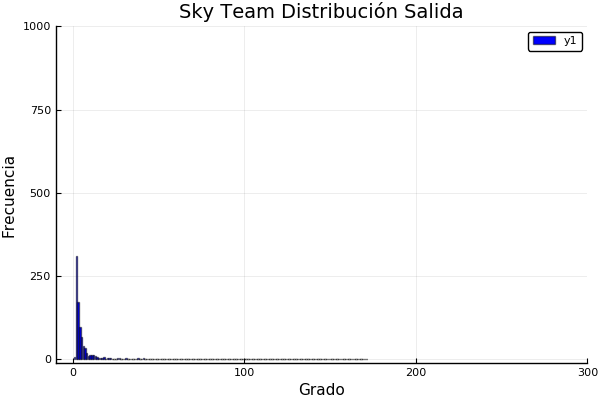

In [93]:
out_ST = plot_distrib(multiplex_ST, "out", "Sky Team Distribución Salida", "blue")

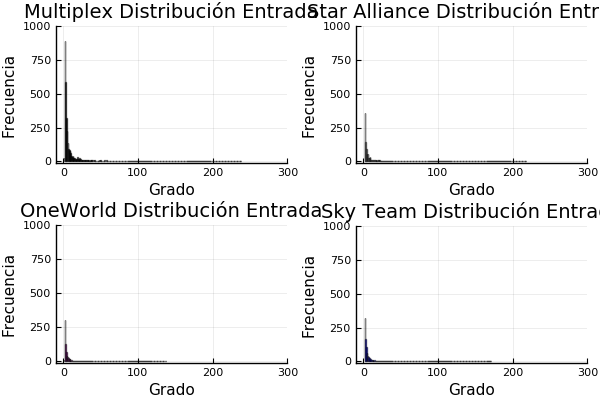

In [94]:
plot(in_M, in_SA, in_OW, in_ST, layout = (2, 2), legend = false)

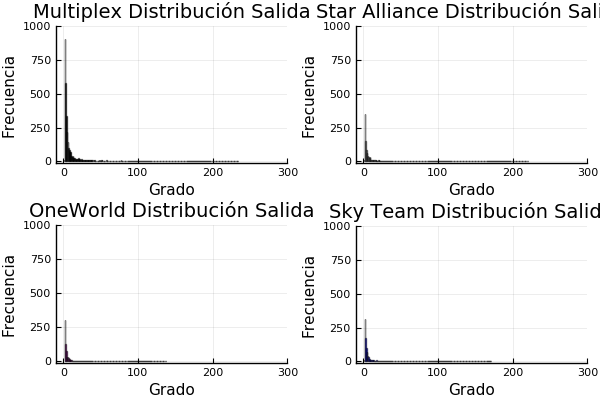

In [95]:
plot(out_M, out_SA, out_OW, out_ST, layout = (2, 2), legend = false)

In [ ]:
d_in = groupedbar(in_M, in_SA, in_OW, in_ST, color = "#0f87bf", alpha = 0.8,
    title="Distribución Grado de Entrada", 
    xlabel="Grado", 
    ylabel="Frecuencia")
#bar!(d_in_SA,color="#0f87bf",alpha=0.4)
#bar!(d_in_OW,color="#0f00bf",alpha=0.4)
#bar!(d_in_ST,color="#0f50bf",alpha=0.4)

## Vecinos

### Multiplex global

In [106]:
vecinos_M = @time vecinos(multiplex)

  0.170908 seconds (28.28 k allocations: 79.444 MiB, 13.88% gc time)


3189-element Array{Any,1}:
 [4, 8, 9, 15, 352, 594, 670, 671, 682, 724, 727, 728, 837, 998, 1527, 1531, 2274]                        
 [4, 8, 9, 10, 232, 594, 1829]                                                                            
 [4, 8, 9, 14, 90, 244, 478, 594, 682, 724, 725, 728, 1527, 1752]                                         
 [1, 2, 3, 5, 6, 7, 8, 9, 10, 11  …  2741, 2742, 2743, 2744, 2797, 2845, 2846, 2847, 2865, 3089]          
 [4, 7, 8, 9, 671, 725, 753, 759, 2408]                                                                   
 [4, 9, 10, 11, 14, 15, 232, 304, 319, 340  …  1015, 1527, 1530, 1531, 1532, 1561, 1829, 1960, 2274, 2282]
 [4, 5, 9, 193, 594, 684, 997, 1527, 1531, 1756]                                                          
 [1, 2, 3, 4, 5, 9, 15, 90, 242, 246  …  423, 594, 723, 724, 725, 727, 728, 730, 1527, 1752]              
 [1, 2, 3, 4, 5, 6, 7, 8, 10, 11  …  2231, 2274, 2282, 2550, 2552, 2734, 2738, 2742, 2846, 2865]          
 [2, 4, 6,

### Star Alliance

In [103]:
vecinos_SA = @time vecinos(multiplex_SA)

  0.009654 seconds (7.13 k allocations: 7.153 MiB)


934-element Array{Any,1}:
 [3, 40, 61]                                                                               
 [3, 6, 9, 12, 16, 18, 19, 20, 26, 39  …  740, 742, 744, 745, 746, 747, 748, 749, 750, 751]
 [1, 2, 4, 5, 6, 7, 9, 10, 11, 12  …  69, 70, 71, 72, 73, 74, 83, 495, 528, 566]           
 [3, 11, 19, 26, 162, 176, 184, 223, 290, 476]                                             
 [3]                                                                                       
 [2, 3, 9, 11, 19, 20, 26, 54, 55, 70  …  72, 73, 80, 83, 89, 96, 235, 495, 553, 578]      
 [3, 19, 20, 26, 54, 72, 73, 566]                                                          
 [23]                                                                                      
 [2, 3, 6, 10, 11, 12, 15, 18, 19, 20  …  752, 754, 755, 756, 757, 758, 760, 761, 781, 838]
 [3, 9, 11, 16, 19, 26, 54, 72, 73, 83, 553]                                               
 [3, 4, 6, 9, 10, 12, 15, 18, 19, 20  …  597, 598, 599

### OneWorld

In [104]:
vecinos_OW = @time vecinos(multiplex_OW)

  0.005333 seconds (5.16 k allocations: 4.081 MiB)


698-element Array{Any,1}:
 [2, 3, 11, 61, 85, 89, 115, 127, 129, 135, 207]                                            
 [1, 3, 10, 11, 13, 14, 18, 19, 20, 21  …  226, 228, 231, 233, 236, 238, 239, 246, 249, 433]
 [1, 2, 10, 46, 177, 207]                                                                   
 [177]                                                                                      
 [61]                                                                                       
 [46]                                                                                       
 [46, 177]                                                                                  
 [96, 120, 127, 177, 265, 271, 292]                                                         
 [178]                                                                                      
 [2, 3, 46, 115, 218, 271, 364]                                                             
 [1, 2, 89]                                 

### Sky Team

In [105]:
vecinos_ST = @time vecinos(multiplex_ST)

  0.009360 seconds (6.82 k allocations: 6.661 MiB)


900-element Array{Any,1}:
 [15, 35]                                                                                   
 [11, 15, 31, 33, 35, 37, 136]                                                              
 [8, 9, 12, 18, 19, 21, 22, 28, 31, 33  …  614, 615, 617, 618, 620, 622, 623, 624, 625, 628]
 [35]                                                                                       
 [28, 31, 33, 35, 95, 133]                                                                  
 [25, 31, 33, 35, 136]                                                                      
 [22, 25, 28, 31, 33, 35]                                                                   
 [3, 18, 28, 95, 188, 286, 289]                                                             
 [3, 18, 25, 28, 31, 33, 34, 35, 42, 95]                                                    
 [18, 28, 34, 38, 73, 75, 123, 143, 161, 188]                                               
 [2, 35, 133]                               

## Caminatas aleatorias

### Multiplex

In [79]:
caminata_M = @time random_walk(multiplex, 2500, 100)

34802.104033 seconds (5.66 G allocations: 10.553 TiB, 6.01% gc time)


3189-element Array{Any,1}:
 [1 15 … 0 0; 1 1527 … 0 0; … ; 1 1531 … 1150 371; 1 594 … 1023 1877] 
 [2 594 … 0 0; 2 9 … 0 0; … ; 2 8 … 1201 404; 2 232 … 0 0]            
 [3 244 … 0 0; 3 594 … 0 0; … ; 3 1527 … 1202 1149; 3 594 … 1153 1128]
 [4 1226 … 0 0; 4 670 … 0 0; … ; 4 2740 … 457 486; 4 3 … 0 0]         
 [5 2408 … 0 0; 5 725 … 0 0; … ; 5 2408 … 2660 2657; 5 7 … 0 0]       
 [6 2282 … 0 0; 6 441 … 0 0; … ; 6 11 … 0 0; 6 494 … 457 486]         
 [7 5 … 0 0; 7 9 … 0 0; … ; 7 1531 … 0 0; 7 594 … 0 0]                
 [8 9 … 0 0; 8 728 … 0 0; … ; 8 594 … 0 0; 8 5 … 1391 1371]           
 [9 2 … 0 0; 9 188 … 0 0; … ; 9 2738 … 43 1656; 9 1823 … 0 0]         
 [10 4 … 0 0; 10 594 … 0 0; … ; 10 90 … 0 0; 10 683 … 223 418]        
 [11 724 … 0 0; 11 15 … 0 0; … ; 11 6 … 1150 371; 11 6 … 1023 1877]   
 [12 2797 … 0 0; 12 17 … 0 0; … ; 12 17 … 0 0; 12 15 … 457 486]       
 [13 14 … 0 0; 13 15 … 0 0; … ; 13 2275 … 0 0; 13 4 … 2000 449]       
 ⋮                                                

In [110]:
caminata_M = @time random_walk(multiplex, 2500, 100) #nuevo

838.089941 seconds (1.41 G allocations: 304.549 GiB, 9.79% gc time)


3189-element Array{Any,1}:
 [1 15 … 0 0; 1 1527 … 0 0; … ; 1 1531 … 1150 371; 1 594 … 1023 1877] 
 [2 594 … 0 0; 2 9 … 0 0; … ; 2 8 … 1201 404; 2 232 … 0 0]            
 [3 244 … 0 0; 3 594 … 0 0; … ; 3 1527 … 1202 1149; 3 594 … 1153 1128]
 [4 1226 … 0 0; 4 670 … 0 0; … ; 4 2740 … 457 486; 4 3 … 0 0]         
 [5 2408 … 0 0; 5 725 … 0 0; … ; 5 2408 … 2660 2657; 5 7 … 0 0]       
 [6 2282 … 0 0; 6 441 … 0 0; … ; 6 11 … 0 0; 6 494 … 457 486]         
 [7 5 … 0 0; 7 9 … 0 0; … ; 7 1531 … 0 0; 7 594 … 0 0]                
 [8 9 … 0 0; 8 728 … 0 0; … ; 8 594 … 0 0; 8 5 … 1391 1371]           
 [9 2 … 0 0; 9 188 … 0 0; … ; 9 2738 … 43 1656; 9 1823 … 0 0]         
 [10 4 … 0 0; 10 594 … 0 0; … ; 10 90 … 0 0; 10 683 … 223 418]        
 [11 724 … 0 0; 11 15 … 0 0; … ; 11 6 … 1150 371; 11 6 … 1023 1877]   
 [12 2797 … 0 0; 12 17 … 0 0; … ; 12 17 … 0 0; 12 15 … 457 486]       
 [13 14 … 0 0; 13 15 … 0 0; … ; 13 2275 … 0 0; 13 4 … 2000 449]       
 ⋮                                                

In [76]:
#Matriz que contiene 10 iteraciones de 100 pasos con nodo inicial 3
caminata_M[3]

UndefVarError: UndefVarError: caminata_M not defined

### Star Alliance

In [78]:
caminata_SA = @time random_walk(multiplex_SA, 2500, 100)

5057.323897 seconds (1.68 G allocations: 1.159 TiB, 6.79% gc time)


934-element Array{Any,1}:
 [1 61 … 0 0; 1 3 … 0 0; … ; 1 40 … 349 309; 1 61 … 0 0]                 
 [2 119 … 0 0; 2 19 … 0 0; … ; 2 736 … 495 12; 2 54 … 0 0]               
 [3 59 … 0 0; 3 495 … 0 0; … ; 3 13 … 349 309; 3 20 … 9 576]             
 [4 11 … 0 0; 4 11 … 0 0; … ; 4 476 … 495 12; 4 184 … 0 0]               
 [5 3 … 0 0; 5 3 … 0 0; … ; 5 3 … 318 308; 5 3 … 0 0]                    
 [6 20 … 0 0; 6 26 … 0 0; … ; 6 20 … 9 576; 6 553 … 0 0]                 
 [7 19 … 0 0; 7 3 … 0 0; … ; 7 3 … 0 0; 7 72 … 350 387]                  
 [8 23 … 0 0; 8 23 … 0 0; … ; 8 23 … 318 308; 8 23 … 407 119]            
 [9 45 … 0 0; 9 15 … 0 0; … ; 9 511 … 0 0; 9 758 … 0 0]                  
 [10 9 … 0 0; 10 54 … 0 0; … ; 10 19 … 318 308; 10 54 … 0 0]             
 [11 10 … 0 0; 11 292 … 0 0; … ; 11 598 … 495 12; 11 71 … 0 0]           
 [12 3 … 0 0; 12 11 … 0 0; … ; 12 132 … 0 0; 12 495 … 350 387]           
 [13 15 … 0 0; 13 15 … 0 0; … ; 13 3 … 0 0; 13 15 … 350 387]             
 ⋮          

In [109]:
caminata_SA = @time random_walk(multiplex_SA, 2500, 100)

 58.936874 seconds (333.80 M allocations: 23.659 GiB, 15.26% gc time)


934-element Array{Any,1}:
 [1 61 … 0 0; 1 3 … 0 0; … ; 1 40 … 349 309; 1 61 … 0 0]                 
 [2 119 … 0 0; 2 19 … 0 0; … ; 2 736 … 495 12; 2 54 … 0 0]               
 [3 59 … 0 0; 3 495 … 0 0; … ; 3 13 … 349 309; 3 20 … 9 576]             
 [4 11 … 0 0; 4 11 … 0 0; … ; 4 476 … 495 12; 4 184 … 0 0]               
 [5 3 … 0 0; 5 3 … 0 0; … ; 5 3 … 318 308; 5 3 … 0 0]                    
 [6 20 … 0 0; 6 26 … 0 0; … ; 6 20 … 9 576; 6 553 … 0 0]                 
 [7 19 … 0 0; 7 3 … 0 0; … ; 7 3 … 0 0; 7 72 … 350 387]                  
 [8 23 … 0 0; 8 23 … 0 0; … ; 8 23 … 318 308; 8 23 … 407 119]            
 [9 45 … 0 0; 9 15 … 0 0; … ; 9 511 … 0 0; 9 758 … 0 0]                  
 [10 9 … 0 0; 10 54 … 0 0; … ; 10 19 … 318 308; 10 54 … 0 0]             
 [11 10 … 0 0; 11 292 … 0 0; … ; 11 598 … 495 12; 11 71 … 0 0]           
 [12 3 … 0 0; 12 11 … 0 0; … ; 12 132 … 0 0; 12 495 … 350 387]           
 [13 15 … 0 0; 13 15 … 0 0; … ; 13 3 … 0 0; 13 15 … 350 387]             
 ⋮          

### OneWorld

In [107]:
caminata_OW = @time random_walk(multiplex_OW, 2500, 100)

 14.799766 seconds (58.12 M allocations: 6.761 GiB, 27.38% gc time)


698-element Array{Any,1}:
 [1 3 … 0 0; 1 207 … 0 0; … ; 1 115 … 0 0; 1 61 … 0 0]      
 [2 183 … 0 0; 2 177 … 0 0; … ; 2 129 … 0 0; 2 207 … 0 0]   
 [3 207 … 0 0; 3 10 … 0 0; … ; 3 177 … 0 0; 3 2 … 0 0]      
 [4 177 … 0 0; 4 177 … 0 0; … ; 4 177 … 0 0; 4 177 … 0 0]   
 [5 61 … 0 0; 5 61 … 0 0; … ; 5 61 … 0 0; 5 61 … 0 0]       
 [6 46 … 0 0; 6 46 … 0 0; … ; 6 46 … 0 0; 6 46 … 0 0]       
 [7 177 … 0 0; 7 177 … 0 0; … ; 7 177 … 0 0; 7 177 … 0 0]   
 [8 271 … 0 0; 8 127 … 0 0; … ; 8 127 … 0 0; 8 292 … 0 0]   
 [9 178 … 0 0; 9 178 … 0 0; … ; 9 178 … 0 0; 9 178 … 0 0]   
 [10 271 … 0 0; 10 46 … 0 0; … ; 10 218 … 0 0; 10 218 … 0 0]
 [11 89 … 0 0; 11 89 … 0 0; … ; 11 89 … 0 0; 11 2 … 0 0]    
 [12 127 … 0 0; 12 292 … 0 0; … ; 12 62 … 0 0; 12 261 … 0 0]
 [13 61 … 0 0; 13 105 … 0 0; … ; 13 105 … 0 0; 13 61 … 0 0] 
 ⋮                                                          
 [687 0 … 0 0; 687 0 … 0 0; … ; 687 0 … 0 0; 687 0 … 0 0]   
 [688 0 … 0 0; 688 0 … 0 0; … ; 688 0 … 0 0; 688 0 … 0 0]  

In [ ]:
caminata_OW[698]

### Sky Team

In [77]:
caminata_ST = @time random_walk(multiplex_ST, 2500, 100)

2085.679617 seconds (938.94 M allocations: 647.023 GiB, 7.34% gc time)


900-element Array{Any,1}:
 [1 35 … 0 0; 1 35 … 0 0; … ; 1 15 … 0 0; 1 15 … 0 0]            
 [2 37 … 0 0; 2 11 … 0 0; … ; 2 136 … 0 0; 2 31 … 0 0]           
 [3 100 … 0 0; 3 72 … 0 0; … ; 3 28 … 0 0; 3 488 … 0 0]          
 [4 35 … 0 0; 4 35 … 0 0; … ; 4 35 … 0 0; 4 35 … 0 0]            
 [5 133 … 0 0; 5 133 … 0 0; … ; 5 28 … 0 0; 5 35 … 0 0]          
 [6 31 … 0 0; 6 31 … 0 0; … ; 6 31 … 0 0; 6 136 … 0 0]           
 [7 35 … 0 0; 7 35 … 0 0; … ; 7 22 … 0 0; 7 35 … 0 0]            
 [8 286 … 0 0; 8 3 … 0 0; … ; 8 3 … 0 0; 8 188 … 0 0]            
 [9 18 … 0 0; 9 18 … 0 0; … ; 9 28 … 0 0; 9 42 … 0 0]            
 [10 28 … 0 0; 10 28 … 0 0; … ; 10 28 … 0 0; 10 161 … 0 0]       
 [11 133 … 0 0; 11 133 … 0 0; … ; 11 133 … 0 0; 11 35 … 0 0]     
 [12 28 … 0 0; 12 28 … 0 0; … ; 12 95 … 0 0; 12 33 … 0 0]        
 [13 35 … 0 0; 13 35 … 0 0; … ; 13 28 … 0 0; 13 35 … 0 0]        
 ⋮                                                               
 [889 48 … 0 0; 889 48 … 0 0; … ; 889 48 … 0 0; 88

In [108]:
caminata_ST = @time random_walk(multiplex_ST, 2500, 100)

 36.733922 seconds (203.43 M allocations: 16.452 GiB, 18.49% gc time)


900-element Array{Any,1}:
 [1 35 … 0 0; 1 35 … 0 0; … ; 1 15 … 0 0; 1 15 … 0 0]            
 [2 37 … 0 0; 2 11 … 0 0; … ; 2 136 … 0 0; 2 31 … 0 0]           
 [3 100 … 0 0; 3 72 … 0 0; … ; 3 28 … 0 0; 3 488 … 0 0]          
 [4 35 … 0 0; 4 35 … 0 0; … ; 4 35 … 0 0; 4 35 … 0 0]            
 [5 133 … 0 0; 5 133 … 0 0; … ; 5 28 … 0 0; 5 35 … 0 0]          
 [6 31 … 0 0; 6 31 … 0 0; … ; 6 31 … 0 0; 6 136 … 0 0]           
 [7 35 … 0 0; 7 35 … 0 0; … ; 7 22 … 0 0; 7 35 … 0 0]            
 [8 286 … 0 0; 8 3 … 0 0; … ; 8 3 … 0 0; 8 188 … 0 0]            
 [9 18 … 0 0; 9 18 … 0 0; … ; 9 28 … 0 0; 9 42 … 0 0]            
 [10 28 … 0 0; 10 28 … 0 0; … ; 10 28 … 0 0; 10 161 … 0 0]       
 [11 133 … 0 0; 11 133 … 0 0; … ; 11 133 … 0 0; 11 35 … 0 0]     
 [12 28 … 0 0; 12 28 … 0 0; … ; 12 95 … 0 0; 12 33 … 0 0]        
 [13 35 … 0 0; 13 35 … 0 0; … ; 13 28 … 0 0; 13 35 … 0 0]        
 ⋮                                                               
 [889 48 … 0 0; 889 48 … 0 0; … ; 889 48 … 0 0; 88

## Longitud de todas las iteraciones de caminatas 

In [111]:
li_M = @time walk_length(caminata_M)

8097.917764 seconds (2.51 G allocations: 7.794 TiB, 21.51% gc time)


3189-element Array{Array,1}:
 [1985, 1642, 215, 392, 684, 486, 486, 1233, 1360, 153  …  737, 56, 2500, 2500, 1741, 1622, 2500, 1862, 2500, 2500]  
 [245, 433, 105, 738, 464, 1642, 215, 1076, 486, 486  …  1028, 2500, 1421, 2500, 2500, 2500, 2500, 1656, 2500, 1824] 
 [164, 81, 433, 105, 738, 228, 1878, 358, 933, 486  …  881, 1047, 878, 2500, 1843, 2054, 703, 328, 2500, 2500]       
 [1985, 1642, 215, 392, 684, 486, 157, 329, 1233, 1360  …  575, 2500, 182, 2500, 846, 2500, 91, 1330, 2500, 737]     
 [1985, 1642, 1291, 486, 486, 1233, 1360, 2500, 2500, 1343  …  2500, 27, 798, 1020, 2500, 1421, 2500, 83, 2500, 690] 
 [1985, 1642, 215, 1076, 486, 486, 1233, 1360, 2500, 2500  …  138, 74, 605, 2500, 74, 2500, 954, 2500, 1421, 2500]   
 [1985, 1642, 54, 161, 392, 684, 486, 486, 1233, 1360  …  1603, 2500, 1421, 2500, 737, 2500, 2500, 1797, 223, 730]   
 [1985, 1642, 215, 1076, 486, 486, 1233, 1360, 2500, 2500  …  2500, 388, 2500, 138, 679, 2500, 182, 2500, 846, 2500] 
 [245, 1740, 1642, 358, 933

In [ ]:
#Longitud de caminata de las 10 iteraciones correspondientes al nodo inicial 3
li_M[3]

In [120]:
li_SA = @time walk_length(caminata_SA)

2620.504915 seconds (786.14 M allocations: 2.594 TiB, 15.45% gc time)


934-element Array{Array,1}:
 [28, 1266, 2500, 1276, 2500, 1194, 908, 2476, 2500, 97  …  1126, 772, 348, 596, 162, 614, 1243, 295, 2500, 31]      
 [28, 97, 1169, 2500, 1276, 2500, 1194, 908, 2476, 2500  …  348, 596, 776, 1243, 295, 2500, 2500, 128, 2500, 195]    
 [125, 1169, 2500, 1276, 2500, 1194, 908, 2476, 2500, 2500  …  40, 732, 348, 596, 162, 614, 1243, 295, 2500, 2500]   
 [125, 1169, 2500, 1276, 2500, 1194, 908, 2476, 2500, 97  …  596, 776, 1243, 10, 285, 2500, 2500, 128, 2500, 195]    
 [125, 1169, 2500, 1276, 2500, 1194, 908, 2476, 2500, 97  …  348, 596, 162, 614, 1243, 295, 2500, 31, 2500, 97]      
 [28, 1266, 2500, 1276, 2500, 1194, 908, 2476, 2500, 2500  …  732, 348, 596, 162, 614, 1243, 295, 2500, 2500, 128]   
 [28, 1266, 2500, 1276, 2500, 1194, 908, 2476, 2500, 97  …  162, 614, 1243, 295, 2500, 2500, 128, 2500, 195, 2500]   
 [28, 1266, 2500, 1276, 2500, 1194, 908, 2476, 2500, 97  …  772, 348, 596, 776, 1243, 295, 2500, 31, 2500, 2500]     
 [28, 97, 1169, 2500, 1276, 

In [ ]:
li_OW = @time walk_length(caminata_OW)

In [ ]:
liST = @time walk_length(caminata_ST)

## Longitud promedio de las iteraciones de caminatas de cada nodo inicial

In [112]:
lpn_M = @time walk_av_length(caminata_M)

8565.553714 seconds (2.51 G allocations: 7.794 TiB, 22.07% gc time)


3189-element Array{Any,1}:
 1487.35
 1436.97
 1194.51
 1309.54
 1334.9 
 1302.17
 1387.04
 1262.96
 1334.9 
 1328.0 
 1487.35
 1302.17
 1334.54
    ⋮   
    0.0 
    0.0 
    0.0 
    0.0 
    0.0 
    0.0 
    0.0 
    0.0 
    0.0 
    0.0 
    0.0 
    0.0 

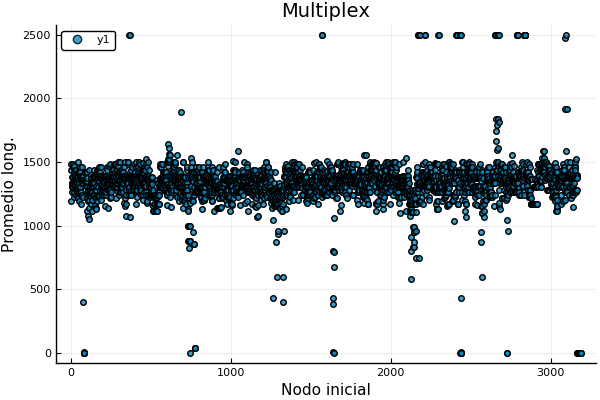

In [113]:
pyplot()
d_lpn_M = scatter(lpn_M, color="#0f87bf",alpha=0.8, 
    title="Multiplex", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [ ]:
lpn_SA = @time walk_av_length(caminata_SA)

In [ ]:
pyplot()
d_lpn_SA = scatter(lpn_SA, color="#0f87bf",alpha=0.8, 
    title="Star Alliance", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [ ]:
lpn_OW = @time walk_av_length(caminata_OW)

In [ ]:
pyplot()
d_lpn_OW = scatter(lpn_OW, color="#0f87bf",alpha=0.8, 
    title="OneWorld", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [ ]:
lpn_ST = @time walk_av_length(caminata_ST)

In [ ]:
pyplot()
d_lpn_ST = scatter(lpn_ST, color="#0f87bf",alpha=0.8, 
    title="Sky Team", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [ ]:
plot(d_lpn_M,d_lpn_SA,d_lpn_OW,d_lpn_ST,layout=(2,2),legend=false)

## Longitud promedio de caminatas por capa

In [114]:
wl_M = @time walk_layer_length(caminata_M)

10171.363652 seconds (2.51 G allocations: 7.794 TiB, 21.48% gc time)


1329.1215992474151

In [ ]:
wl_SA = @time walk_layer_length(caminata_SA)

In [ ]:
wl_OW = @time walk_layer_length(caminata_OW)

In [ ]:
wl_ST = @time walk_layer_length(caminata_ST)

In [ ]:
pyplot()
xx = ["Multiplex", "Star Alliance", "OneWorld", "Sky Team"]
yy = [wl_M, wl_SA, wl_OW, wl_ST]
d_wl = bar(xx, yy, color="#0f87bf",alpha=0.4, 
    title="Longitud caminatas por capa", 
    xlabel="Alianza", 
    ylabel="Long. prom.")
#bar!(xx[2], yy[2])
#bar!(xx[3], yy[3])
#bar!(xx[4], yy[4])

In [ ]:
#NO
pyplot()
histogram(lpn_SA, 
    nbins = 50, 
    title="Longitud promedio de caminata por nodo", 
    xlabel="Promedio por nodo", 
    ylabel="Frecuencia",
    xlims = (0, 110))
histogram!(lpn_OW, nbins=50, falpha=0.4)
histogram!(lpn_ST, nbins=50, falpha=0.3)

## Nodos visitados específicamente

In [115]:
nv_M = @time nodos_visitados(caminata_M)

 51.531132 seconds (8.66 M allocations: 18.090 GiB, 21.00% gc time)


3189-element Array{Any,1}:
 Any[[1, 15, 725, 8, 1752, 670, 20, 24, 594, 351  …  2030, 1421, 329, 281, 354, 653, 2374, 261, 3189, 0], [1, 1527, 997, 473, 188, 494, 475, 457, 3078, 55  …  1093, 1348, 1053, 1992, 1370, 179, 1691, 1685, 3182, 0], [1, 728, 9, 423, 53, 58, 193, 431, 183, 457  …  1146, 1181, 1206, 1950, 2040, 2067, 888, 2059, 3173, 0], [1, 682, 671, 765, 9, 2738, 670, 724, 1862, 728  …  1144, 1717, 904, 894, 903, 1961, 2066, 2059, 3173, 0], [1, 4, 1829, 746, 723, 352, 345, 348, 439, 189  …  1168, 2976, 149, 158, 2584, 2564, 2571, 2569, 3184, 0], [1, 1531, 15, 451, 305, 58, 428, 475, 461, 471  …  2042, 1103, 883, 2041, 2063, 1147, 2068, 2059, 3173, 0], [1, 15, 594, 457, 189, 911, 236, 393, 215, 886  …  985, 45, 974, 986, 1004, 385, 1185, 402, 3173, 0], [1, 671, 242, 14, 1726, 1608, 304, 1661, 266, 2383  …  520, 524, 522, 517, 124, 1190, 195, 891, 3173, 0], [1, 724, 453, 424, 487, 1081, 457, 1363, 1996, 50  …  771, 341, 343, 344, 342, 78, 80, 83, 3169, 0], [1, 352, 183, 193, 18

In [ ]:
#Nodos visitados (diferentes) en cada una de las 10 iteraciones con nodo inicial 3
nv_M[3]

In [ ]:
nv_SA = @time nodos_visitados(caminata_SA)

In [ ]:
nv_OW = @time nodos_visitados(caminata_OW)

In [ ]:
nv_ST = @time nodos_visitados(caminata_ST)

## Cobertura (nodos distintos)

In [116]:
cobi_M = @time cobertura(caminata_M)

 78.766496 seconds (9.14 M allocations: 18.104 GiB, 31.16% gc time)


3189-element Array{Any,1}:
 [795, 712, 169, 262, 393, 310, 299, 611, 660, 123  …  420, 54, 878, 902, 715, 703, 893, 741, 874, 907] 
 [191, 276, 87, 415, 313, 717, 158, 550, 309, 310  …  508, 864, 680, 877, 99, 902, 877, 709, 891, 755]  
 [117, 68, 277, 87, 412, 180, 764, 235, 500, 308  …  452, 553, 466, 876, 732, 753, 406, 227, 914, 901]  
 [788, 723, 162, 260, 402, 311, 132, 222, 586, 660  …  346, 908, 149, 862, 438, 861, 72, 655, 876, 422] 
 [792, 712, 575, 308, 304, 601, 668, 840, 892, 599  …  923, 26, 421, 532, 864, 680, 904, 74, 35, 402]   
 [793, 712, 161, 548, 325, 298, 603, 657, 848, 883  …  106, 67, 362, 907, 63, 882, 478, 855, 647, 881]  
 [796, 713, 35, 131, 262, 404, 325, 303, 603, 658  …  673, 852, 690, 894, 422, 885, 899, 705, 159, 434] 
 [795, 720, 160, 544, 309, 283, 608, 659, 842, 878  …  866, 253, 945, 111, 393, 922, 151, 871, 450, 858]
 [187, 748, 729, 234, 479, 310, 316, 594, 656, 32  …  901, 895, 905, 672, 864, 672, 886, 76, 880, 403]  
 [787, 717, 161, 544, 299, 2

In [ ]:
#Número de nodos distintos que visita en cada iteración que se hizo con nodo inicial 3
cobi_M[3]

In [121]:
cobi_SA = @time cobertura(caminata_SA)

 21.349110 seconds (2.53 M allocations: 3.870 GiB, 49.20% gc time)


934-element Array{Any,1}:
 [25, 390, 540, 394, 556, 400, 336, 548, 543, 68  …  369, 304, 179, 234, 99, 260, 396, 158, 531, 26]  
 [25, 69, 363, 530, 395, 548, 396, 334, 546, 541  …  175, 230, 271, 399, 152, 530, 562, 88, 535, 118] 
 [74, 374, 530, 393, 549, 394, 333, 547, 534, 530  …  30, 292, 176, 233, 100, 235, 403, 158, 532, 561]
 [71, 373, 538, 395, 543, 400, 329, 550, 541, 67  …  248, 274, 398, 10, 151, 526, 557, 89, 524, 119]  
 [78, 375, 531, 394, 545, 400, 330, 549, 534, 68  …  170, 234, 99, 238, 396, 152, 525, 26, 563, 68]   
 [25, 388, 529, 398, 548, 397, 333, 546, 540, 534  …  303, 172, 249, 101, 239, 401, 153, 523, 561, 83]
 [25, 390, 530, 393, 552, 390, 329, 553, 533, 66  …  102, 242, 395, 146, 527, 563, 89, 534, 120, 529] 
 [26, 390, 532, 393, 543, 394, 329, 547, 541, 64  …  309, 179, 231, 275, 400, 153, 526, 25, 557, 521] 
 [25, 64, 370, 538, 396, 549, 392, 336, 545, 540  …  232, 101, 236, 398, 148, 526, 562, 522, 111, 95] 
 [24, 391, 530, 390, 544, 396, 333, 545, 533, 5

In [122]:
cobi_OW = @time cobertura(caminata_OW)

 28.925539 seconds (1.58 M allocations: 2.015 GiB, 15.80% gc time)


698-element Array{Any,1}:
 [269, 57, 11, 194, 108, 77, 197, 203, 96, 34  …  35, 117, 207, 12, 78, 36, 225, 79, 124, 318]    
 [274, 43, 32, 197, 108, 74, 192, 203, 92, 121  …  70, 27, 66, 190, 171, 316, 124, 250, 305, 20]  
 [271, 44, 34, 11, 194, 107, 74, 192, 204, 97  …  132, 316, 299, 300, 296, 171, 168, 277, 146, 74]
 [13, 269, 44, 34, 4, 194, 110, 80, 196, 204  …  260, 12, 80, 68, 25, 213, 171, 6, 319, 296]      
 [271, 45, 207, 109, 80, 194, 208, 96, 121, 75  …  318, 301, 301, 299, 169, 30, 154, 277, 153, 88]
 [269, 38, 206, 107, 232, 205, 96, 12, 15, 156  …  43, 342, 171, 44, 178, 230, 91, 125, 65, 132]  
 [13, 268, 38, 206, 107, 80, 197, 205, 95, 12  …  44, 17, 45, 4, 150, 231, 91, 125, 68, 38]       
 [264, 56, 193, 159, 196, 210, 93, 34, 152, 26  …  299, 303, 299, 171, 166, 277, 147, 77, 110, 58]
 [269, 56, 195, 107, 230, 206, 10, 87, 35, 48  …  53, 151, 57, 231, 92, 122, 64, 37, 114, 209]    
 [264, 38, 198, 113, 76, 195, 203, 91, 12, 62  …  131, 209, 12, 99, 236, 80, 133, 3

In [123]:
cobi_ST = @time cobertura(caminata_ST)

 25.149452 seconds (2.31 M allocations: 3.266 GiB, 22.42% gc time)


900-element Array{Any,1}:
 [419, 470, 257, 203, 392, 165, 342, 406, 351, 81  …  119, 130, 535, 260, 374, 545, 223, 193, 338, 95] 
 [422, 454, 260, 203, 392, 152, 343, 412, 360, 367  …  542, 256, 373, 66, 536, 224, 193, 345, 93, 383] 
 [423, 464, 258, 199, 391, 137, 353, 127, 372, 347  …  277, 5, 424, 121, 235, 149, 456, 265, 12, 370]  
 [418, 470, 257, 203, 394, 165, 341, 136, 380, 360  …  255, 375, 545, 213, 194, 348, 97, 367, 187, 188]
 [426, 464, 256, 202, 392, 11, 148, 342, 405, 348  …  279, 438, 119, 121, 160, 89, 91, 456, 254, 374]  
 [421, 464, 269, 203, 394, 151, 342, 136, 373, 347  …  121, 151, 28, 138, 450, 259, 11, 377, 66, 533]  
 [418, 469, 269, 208, 392, 149, 342, 403, 354, 367  …  207, 161, 90, 90, 453, 265, 372, 543, 16, 209]  
 [421, 460, 267, 200, 393, 151, 341, 404, 359, 367  …  120, 160, 152, 455, 253, 374, 70, 533, 223, 212]
 [421, 459, 268, 208, 395, 150, 341, 137, 380, 358  …  319, 373, 300, 281, 436, 116, 232, 86, 89, 459] 
 [423, 453, 258, 200, 393, 151, 341, 4

## Cobertura promedio de las caminatas de cada aeropuerto inicial

In [117]:
cobs_M = @time n_cobertura_av(caminata_M)

 77.236506 seconds (9.14 M allocations: 18.104 GiB, 26.12% gc time)


3189-element Array{Any,1}:
 598.98
 559.26
 501.15
 537.81
 536.31
 538.84
 563.75
 520.1 
 541.55
 546.04
 579.76
 543.56
 544.85
   ⋮   
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 

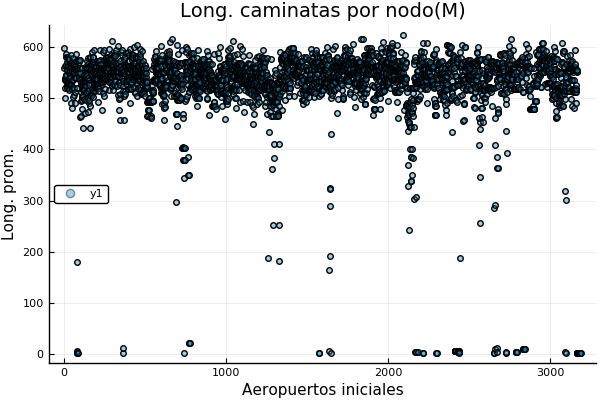

In [118]:
d_cobs_M = scatter(cobs_M, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(M)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

In [124]:
cobs_SA = @time n_cobertura_av(caminata_SA)

 13.615094 seconds (2.53 M allocations: 3.870 GiB, 31.88% gc time)


934-element Array{Any,1}:
 377.06
 385.45
 380.88
 384.05
 381.29
 378.71
 389.95
 386.2 
 385.16
 380.71
 387.34
 391.75
 391.71
   ⋮   
 364.54
 376.1 
 387.11
 382.02
 381.54
 382.14
 382.36
 391.1 
   2.0 
   2.0 
   2.0 
   2.0 

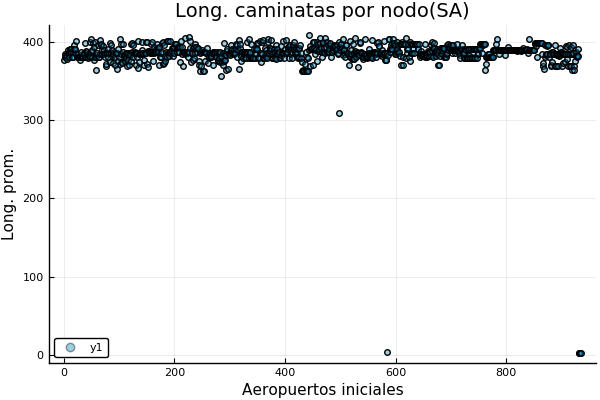

In [125]:
d_cobs_SA = scatter(cobs_SA, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(SA)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

In [126]:
cobs_OW = @time n_cobertura_av(caminata_OW)

  8.493188 seconds (1.58 M allocations: 2.015 GiB, 32.90% gc time)


698-element Array{Any,1}:
 132.36
 140.29
 149.71
 136.51
 150.87
 125.11
 123.25
 150.98
 127.17
 140.74
 148.31
 147.4 
 134.15
   ⋮   
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 
   2.0 

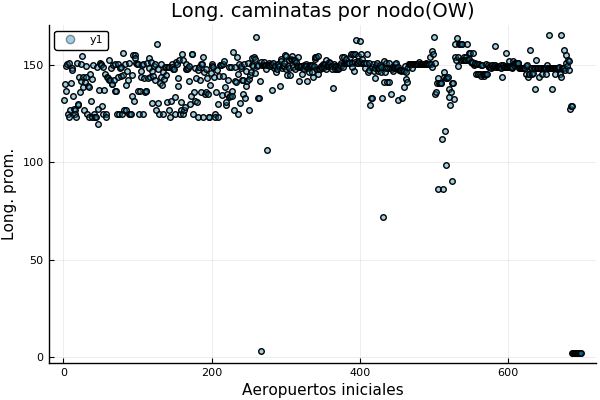

In [127]:
d_cobs_OW = scatter(cobs_OW, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(OW)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

In [128]:
cobs_ST = @time n_cobertura_av(caminata_ST)

 12.289262 seconds (2.31 M allocations: 3.266 GiB, 33.40% gc time)


900-element Array{Any,1}:
 298.07
 301.57
 285.94
 305.77
 287.66
 289.51
 292.62
 296.67
 280.89
 297.66
 303.48
 282.35
 284.76
   ⋮   
 294.34
 294.18
 298.91
 297.98
 293.88
 308.59
 293.98
 292.79
   2.0 
   2.0 
   2.0 
   2.0 

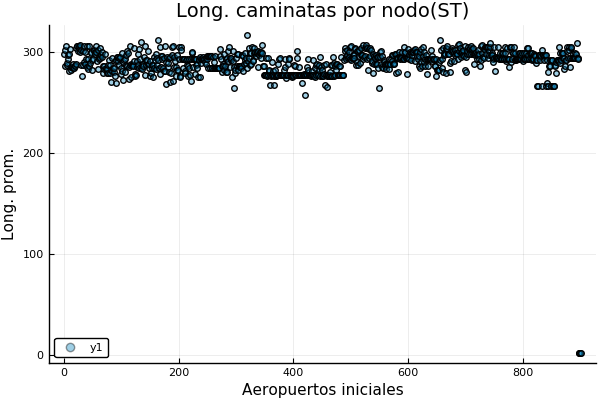

In [129]:
d_cobs_ST = scatter(cobs_ST, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(ST)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

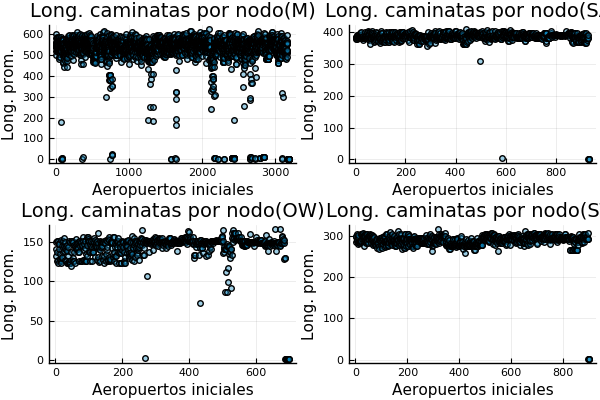

In [130]:
plot(d_cobs_M,d_cobs_SA,d_cobs_OW,d_cobs_ST,layout=(2,2),legend=false)

In [ ]:
#NO

In [ ]:
cobs_SA = @time n_cobertura_av(caminata_SA)

In [ ]:
difSA = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
plot(dif_SA)

In [ ]:
dif_SA

In [ ]:
b = bar(dif_SA,xlim=(0,90),color="#0f87bf",alpha=0.4)

In [ ]:
dif_OW = @time n_cobertura_av(caminata_OW)

In [ ]:
difOW = histogram(dif_OW, nbins=100,title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
dif_ST = @time n_cobertura_av(caminata_ST)

In [ ]:
difST = histogram(dif_ST,nbins=100, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
plot(difSA, difOW, difST, layout=(1,3),legend=false)

In [ ]:
difs = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio", ylabel="Frecuencia")
histogram!(dif_OW, falpha=0.4)
histogram!(dif_ST, falpha=0.4)

In [ ]:
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)

In [ ]:
#Plot que en el eje x tenga cada nodo inicial (aeropuerto) y en el eje y el promedio

In [ ]:
h = bar(1:80, frqs, color="#0f87bf",align="center",alpha=0.4)

## Cobertura promedio por alianza

In [119]:
cobp_M = @time cobertura_av(caminata_M)

 81.124475 seconds (9.13 M allocations: 18.103 GiB, 26.60% gc time)


524.4462025713391

In [131]:
cobp_SA = @time cobertura_av(caminata_SA)

 12.851171 seconds (2.53 M allocations: 3.870 GiB, 30.97% gc time)


384.997023554604

In [132]:
cobp_OW = @time cobertura_av(caminata_OW)

  7.974315 seconds (1.58 M allocations: 2.015 GiB, 30.24% gc time)


142.49216332378214

In [133]:
cobp_ST = @time cobertura_av(caminata_ST)

 13.068927 seconds (2.32 M allocations: 3.266 GiB, 33.73% gc time)


289.5270444444447

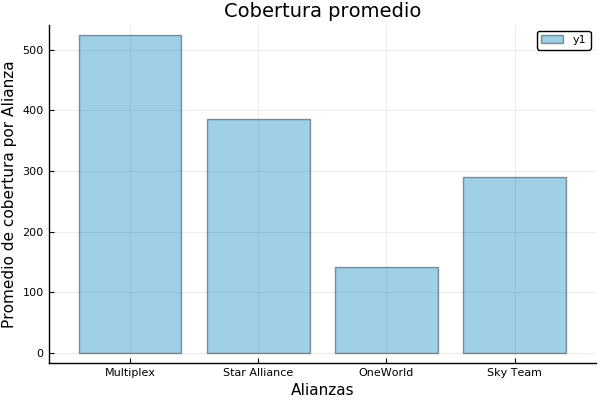

In [134]:
x = ["Multiplex", "Star Alliance", "OneWorld", "Sky Team"]
y = [cobp_M, cobp_SA, cobp_OW, cobp_ST]
b = bar(x, y,
    color="#0f87bf",
    title="Cobertura promedio",
    xlabel="Alianzas",
    ylabel = "Promedio de cobertura por Alianza", 
    alpha=0.4)

In [148]:
distrib_nodos_prom(caminata_M)

DimensionMismatch: DimensionMismatch("tried to assign 3168-element array to 1×3190 destination")

In [147]:
plot_freq_nodos_prom(caminata_M)

DimensionMismatch: DimensionMismatch("tried to assign 3168-element array to 1×3190 destination")

## Endpoints

In [135]:
at_M = @time endpoints(caminata_M)

136.386966 seconds (10.84 M allocations: 18.173 GiB, 29.90% gc time)


3189-element Array{Any,1}:
 [3189, 3182, 3173, 3173, 3184, 3173, 3173, 3173, 3169, 3175  …  3173, 3172, 0, 0, 3174, 3188, 0, 3187, 0, 0]               
 [3179, 3182, 3184, 3182, 3189, 3182, 3173, 3184, 3173, 3173  …  3173, 0, 3187, 0, 0, 0, 0, 3188, 0, 3182]                  
 [3173, 3179, 3182, 3184, 3182, 3175, 3182, 3171, 3184, 3173  …  3187, 3175, 3188, 0, 3173, 3177, 3182, 3173, 0, 0]         
 [3189, 3182, 3173, 3173, 3184, 3173, 3179, 3173, 3173, 3169  …  3173, 0, 3173, 0, 3173, 0, 3173, 3187, 0, 3173]            
 [3189, 3182, 3184, 3173, 3173, 3173, 3169, 0, 0, 3184  …  0, 3173, 3183, 3173, 0, 3187, 0, 3189, 0, 3173]                  
 [3189, 3182, 3173, 3184, 3173, 3173, 3173, 3169, 0, 0  …  3177, 3186, 3173, 0, 3175, 0, 3173, 0, 3187, 0]                  
 [3189, 3182, 3171, 3173, 3173, 3184, 3173, 3173, 3173, 3169  …  3173, 0, 3187, 0, 3173, 0, 0, 3174, 3189, 3176]            
 [3189, 3182, 3173, 3184, 3173, 3173, 3173, 3169, 0, 0  …  0, 3173, 0, 3177, 3173, 0, 3173, 0, 317

In [136]:
at_SA = @time endpoints(caminata_SA)

 17.856834 seconds (2.92 M allocations: 3.887 GiB, 43.90% gc time)


934-element Array{Any,1}:
 [932, 932, 0, 934, 0, 932, 933, 932, 0, 933  …  933, 932, 932, 933, 933, 932, 932, 934, 0, 933]        
 [932, 934, 932, 0, 934, 0, 932, 933, 932, 0  …  932, 933, 932, 932, 934, 0, 0, 934, 0, 932]            
 [934, 932, 0, 934, 0, 932, 933, 932, 0, 0  …  933, 932, 932, 933, 933, 932, 932, 934, 0, 0]            
 [934, 932, 0, 934, 0, 932, 933, 932, 0, 933  …  933, 932, 932, 934, 934, 0, 0, 934, 0, 932]            
 [934, 932, 0, 934, 0, 932, 933, 932, 0, 933  …  932, 933, 933, 932, 932, 934, 0, 933, 0, 934]          
 [932, 932, 0, 934, 0, 932, 933, 932, 0, 0  …  932, 932, 933, 933, 932, 932, 934, 0, 0, 934]            
 [932, 932, 0, 934, 0, 932, 933, 932, 0, 933  …  933, 932, 932, 934, 0, 0, 934, 0, 932, 0]              
 [932, 932, 0, 934, 0, 932, 933, 932, 0, 933  …  932, 932, 933, 932, 932, 934, 0, 933, 0, 0]            
 [932, 934, 932, 0, 934, 0, 932, 933, 932, 0  …  933, 933, 932, 932, 934, 0, 0, 0, 933, 932]            
 [932, 932, 0, 934, 0, 932, 9

In [137]:
at_OW = @time endpoints(caminata_OW)

  7.861407 seconds (1.93 M allocations: 2.030 GiB, 25.14% gc time)


698-element Array{Any,1}:
 [690, 695, 689, 697, 693, 689, 697, 688, 688, 697  …  692, 687, 691, 697, 689, 691, 688, 695, 689, 693]
 [690, 690, 695, 697, 693, 689, 697, 688, 688, 697  …  691, 697, 689, 688, 689, 693, 695, 689, 687, 694]
 [690, 690, 695, 689, 697, 693, 689, 697, 688, 688  …  689, 693, 689, 687, 693, 693, 693, 690, 688, 688]
 [695, 690, 690, 695, 690, 697, 693, 689, 697, 688  …  691, 697, 689, 691, 697, 688, 689, 690, 693, 689]
 [690, 690, 697, 693, 689, 697, 688, 688, 697, 688  …  693, 689, 687, 693, 693, 689, 693, 690, 688, 695]
 [690, 690, 697, 693, 697, 688, 688, 687, 691, 688  …  693, 692, 695, 691, 691, 690, 697, 697, 697, 687]
 [695, 690, 690, 697, 693, 689, 697, 688, 688, 687  …  691, 695, 690, 692, 691, 690, 697, 697, 697, 692]
 [690, 695, 697, 689, 697, 688, 688, 697, 688, 693  …  689, 687, 693, 693, 693, 690, 688, 688, 693, 691]
 [690, 695, 697, 693, 697, 688, 695, 688, 697, 691  …  690, 691, 693, 690, 697, 697, 697, 692, 687, 691]
 [690, 690, 697, 693, 689, 69

In [138]:
at_ST = @time endpoints(caminata_ST)

 11.072244 seconds (2.76 M allocations: 3.285 GiB, 17.07% gc time)


900-element Array{Any,1}:
 [899, 899, 899, 899, 899, 900, 898, 900, 899, 899  …  899, 900, 900, 898, 900, 900, 899, 900, 899, 899]
 [899, 899, 899, 899, 899, 900, 898, 900, 899, 900  …  900, 898, 900, 900, 900, 899, 900, 899, 900, 899]
 [899, 899, 899, 899, 899, 899, 898, 900, 900, 899  …  897, 899, 900, 899, 899, 900, 900, 898, 899, 900]
 [899, 899, 899, 899, 899, 900, 898, 900, 900, 899  …  898, 900, 900, 899, 900, 899, 899, 899, 900, 899]
 [899, 899, 899, 899, 899, 900, 900, 898, 900, 899  …  897, 900, 899, 900, 899, 900, 900, 900, 898, 900]
 [899, 899, 899, 899, 899, 900, 898, 900, 900, 899  …  900, 899, 899, 900, 900, 898, 899, 900, 900, 900]
 [899, 899, 899, 899, 899, 900, 898, 900, 899, 900  …  900, 899, 900, 900, 900, 898, 900, 900, 900, 899]
 [899, 899, 899, 899, 899, 900, 898, 900, 899, 900  …  900, 899, 900, 900, 898, 900, 900, 900, 899, 900]
 [899, 899, 899, 899, 899, 900, 898, 900, 900, 899  …  898, 900, 899, 897, 900, 899, 899, 900, 900, 900]
 [899, 899, 899, 899, 899, 90

## Frecuencia de atractores

In [142]:
f_at_M = @time freq_endpoints(caminata_M)

 76.949426 seconds (11.81 M allocations: 18.516 GiB, 47.91% gc time)


3189-element Array{Any,1}:
 Dict(3185=>2,3169=>2,3182=>5,3172=>4,0=>29,3175=>5,3187=>4,3179=>6,3183=>1,3180=>2…) 
 Dict(3169=>2,3181=>1,3182=>5,3172=>4,0=>29,3175=>3,3187=>3,3179=>8,3180=>3,3184=>7…) 
 Dict(3185=>2,3169=>2,3181=>1,3182=>8,3172=>4,0=>21,3175=>4,3187=>4,3179=>6,3180=>3…) 
 Dict(3185=>1,3169=>3,3181=>2,3182=>3,3172=>3,0=>23,3175=>4,3187=>5,3179=>6,3183=>1…) 
 Dict(3185=>2,3169=>3,3181=>1,3182=>4,3172=>3,0=>23,3175=>2,3187=>5,3179=>5,3183=>2…) 
 Dict(3185=>1,3169=>3,3181=>2,3182=>5,3172=>4,0=>24,3175=>5,3187=>4,3179=>6,3180=>3…) 
 Dict(3185=>1,3169=>2,3181=>1,3182=>3,3172=>5,0=>26,3175=>5,3187=>5,3179=>6,3180=>3…) 
 Dict(3185=>1,3169=>2,3181=>1,3182=>4,3172=>4,0=>22,3175=>6,3187=>3,3179=>8,3180=>3…) 
 Dict(3169=>1,3181=>1,3182=>5,3172=>4,0=>24,3175=>4,3187=>6,3179=>5,3180=>3,3184=>11…)
 Dict(3185=>2,3169=>1,3181=>1,3182=>5,3172=>4,0=>24,3175=>4,3187=>5,3179=>4,3183=>2…) 
 Dict(3169=>2,3181=>1,3182=>6,3172=>4,0=>27,3175=>4,3187=>4,3179=>4,3183=>1,3180=>3…) 
 Dict(3185=>2,31

In [ ]:
#Frecuencia de atractores en las iteraciones de caminatas con nodo inicial 3
f_at_M[3]

In [ ]:
f_at_SA = @time freq_endpoints(caminata_SA)

In [ ]:
f_at_OW = @time freq_endpoints(caminata_OW)

In [ ]:
f_at_ST = @time freq_endpoints(caminata_ST)

## Distribución atractores

In [145]:
d_at_M = @time distrib_endpoints(caminata_M)

 67.021858 seconds (28.15 M allocations: 18.809 GiB, 42.68% gc time)


3189-element Array{Int64,1}:
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     0
     ⋮
   600
 18870
  8103
  2822
 14826
  1799
 31555
  4833
 16785
 13384
  6693
 13188

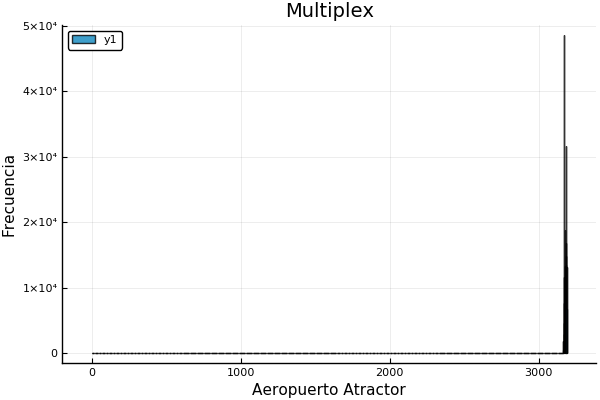

In [146]:
pyplot()
d_d_at_M = bar(d_at_M, color="#0f87bf",alpha=0.8, 
    title="Multiplex", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

In [ ]:
d_at_SA = @time distrib_endpoints(caminata_SA)

In [ ]:
pyplot()
d_d_at_SA = bar(d_at_SA, color="#0f87bf",alpha=0.8, 
    title="Star Alliance", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

In [ ]:
d_at_OW = @time distrib_endpoints(caminata_OW)

In [ ]:
pyplot()
d_d_at_OW = bar(d_at_OW, color="#0f87bf",alpha=0.8, 
    title="OneWorld", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

In [ ]:
d_at_ST = @time distrib_endpoints(caminata_ST)

In [ ]:
pyplot()
d_d_at_ST = bar(d_at_ST, color="#0f87bf",alpha=0.8, 
    title="Sky Team", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

## Gráficas de cobertura

In [12]:
cobp_M = readdlm("/Users/yuriko/Downloads/codejulia/data/global/cobertura/global_layer_coverage.csv", ',', Float64);
cobp_SA = readdlm("/Users/yuriko/Downloads/codejulia/data/Star_Alliance/cobertura/Star_Alliance_layer_coverage.csv", ',', Float64);
cobp_OW = readdlm("/Users/yuriko/Downloads/codejulia/data/oneworld/cobertura/oneworld_layer_coverage.csv", ',', Float64);
cobp_ST = readdlm("/Users/yuriko/Downloads/codejulia/data/Sky_Team/cobertura/Sky_Team_layer_coverage.csv", ',', Float64);

In [15]:
arr = [cobp_M[1], cobp_SA[1], cobp_OW[1], cobp_ST[1]] 

4-element Array{Float64,1}:
 544.4640625000001 
 384.9970235546039 
 142.49216332378222
 289.52704444444447

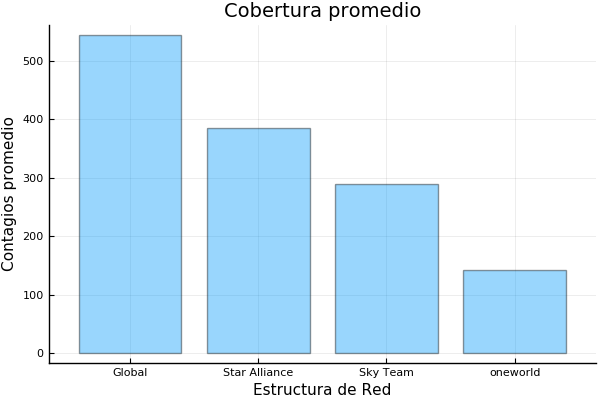

In [54]:
x = ["Global", "Star Alliance", "Sky Team", "oneworld"]
y = [cobp_M[1], cobp_SA[1], cobp_ST[1], cobp_OW[1]]
b = bar(x, y,
    #color = "#0f87bf",
    title = "Cobertura promedio",
    xlabel = "Estructura de Red",
    ylabel = "Contagios promedio",
    legend = false,
    alpha = 0.4)

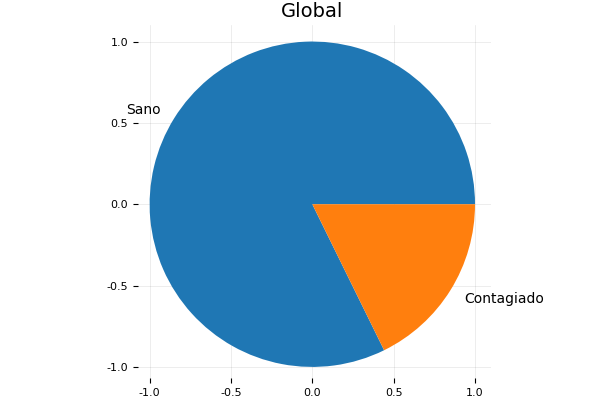

In [45]:
x = ["Sano", "Contagiado"]
y = [2527.54, 544.46]
plot(x, y, title = "Global", l = 0.5, seriestype =:pie)

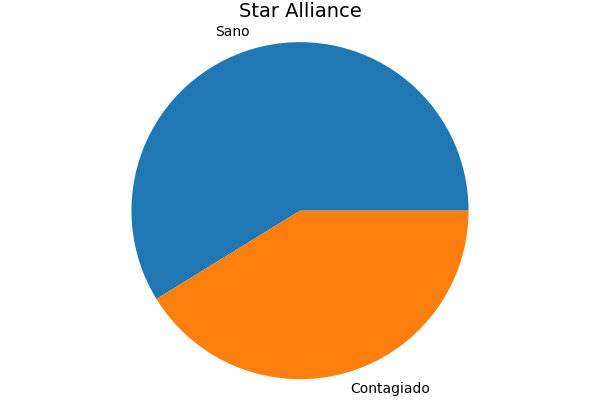

In [34]:
x = ["Sano", "Contagiado"]
y = [549.01, 384.99]
pie(x, y, title="Star Alliance", l=0.5)

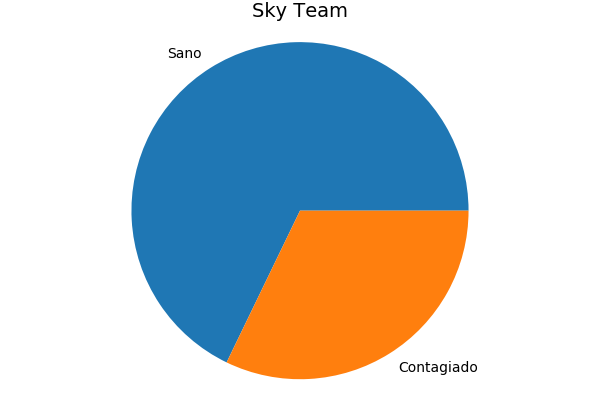

In [36]:
x = ["Sano", "Contagiado"]
y = [610.48, 289.52]
pie(x, y, title="Sky Team", l=0.5)

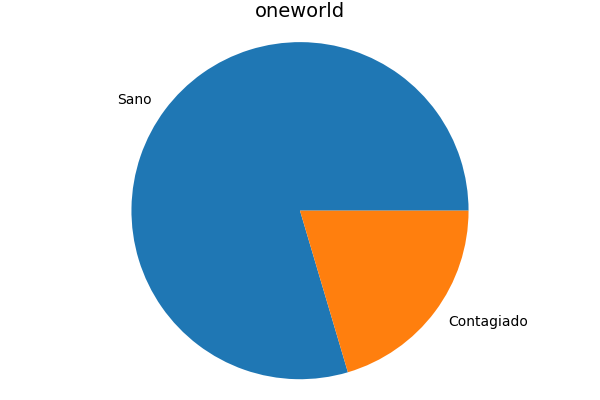

In [37]:
x = ["Sano", "Contagiado"]
y = [555.51, 142.49]
pie(x, y, title="oneworld", l=0.5)

In [58]:
p = pie([1,4],labels=["uno", "cuatro"],shadow=true,startangle=90,autopct="%1.1f%%") ;#explode=explode, ,textprops=fontcolors=["4287f5", "c738c2"],

ErrorException: Unknown key: shadow

In [57]:
globalm = import_matrix("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/global_matriz_du.csv")

3072×3072 Array{Int64,2}:
 0  0  0  1  0  0  0  1  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  1  1  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  1  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  0  1  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  1  0  1  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  0  0  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0

In [62]:
counts(globalm)

2-element Array{Int64,1}:
 9404091
   33093

In [61]:
hj=[0 1 0 1
    1 0 0 0
    1 1 0 1
    1 1 1 0]
counts(hj)

2-element Array{Int64,1}:
 7
 9

In [73]:
SAm = import_matrix("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/Star_Alliance_matriz_du.csv")

934×934 Array{Int64,2}:
 0  0  1  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  1  0  0  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  1  1  1  1  0  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  1  0  0  0  1  1  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  1  0  0  1  1  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  

In [75]:
counts(SAm)

2-element Array{Int64,1}:
 865803
   6553

In [70]:
STm = import_matrix("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/Sky_Team_matriz_du.csv")

900×900 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

In [71]:
counts(STm)

2-element Array{Int64,1}:
 804121
   5879

In [69]:
owm = import_matrix("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/oneworld_matriz_du.csv")

698×698 Array{Int64,2}:
 0  1  1  0  0  0  0  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  0  0  0  1  1  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  

In [72]:
counts(owm)

2-element Array{Int64,1}:
 483625
   3579

In [ ]:
x = ["Star Alliance", "Sky Team", "oneworld"]
y = [, 142.49]
pie(x, y, title="Contagios", l=0.5)

In [ ]:
d_cobs_M = scatter(cobs_M, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(M)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

### Pruebas para figurita de LANET

In [ ]:
rm10 = @time random_walk(multiplex, 10, 50)

In [ ]:
cm10 = cobertura_av(rm10)

In [ ]:
rm20 = @time random_walk(multiplex, 20, 50)

In [ ]:
cm20 = cobertura_av(rm20)

In [ ]:
rm30 = @time random_walk(multiplex, 30, 50)

In [ ]:
cobertura_av(rm30)

In [ ]:
rm40 = @time random_walk(multiplex, 40, 50)

In [ ]:
cobertura_av(rm40)

In [ ]:
rm50 = @time random_walk(multiplex, 50, 50)

In [ ]:
cobertura_av(rm50)

In [ ]:
#Plot de Star Alliance. Cómo se modifica la cobertura si se cambian los pasos.
equis = [10, 20]
ye = [cm10, cm20]
scatter(equis, ye, 
    xlims = (0, 300), ylims = (0, 300),
    aspect_ratio =:equal,
    xlabel = "Pasos", ylabel = "Cobertura promedio",
    title = "Cobertura Total")

In [ ]:
a=1

In [ ]:
r10 = @time random_walk(multiplexSA, 10, 20)

In [ ]:
c10 = cobertura_av(r10)

In [ ]:
r15 = @time random_walk(multiplexSA, 15, 20)

In [ ]:
c15 = cobertura_av(r15)

In [ ]:
r20 = @time random_walk(multiplexSA, 20, 20)

In [ ]:
c20 = cobertura_av(r20)

In [ ]:
r30 = @time random_walk(multiplexSA, 30, 20)

In [ ]:
c30 = cobertura_av(r30)

In [ ]:
r40 = @time random_walk(multiplexSA, 40, 20)

In [ ]:
c40 = cobertura_av(r40)

In [ ]:
r50 = @time random_walk(multiplexSA, 50, 20)

In [ ]:
c50 = cobertura_av(r50)

In [ ]:
r60 = @time random_walk(multiplexSA, 60, 20)

In [ ]:
c60 = cobertura_av(r60)

In [ ]:
r70 = @time random_walk(multiplexSA, 70, 20)

In [ ]:
c70 = cobertura_av(r70)

In [ ]:
r80 = @time random_walk(multiplexSA, 80, 20)

In [ ]:
c80 = cobertura_av(r80)

In [ ]:
r90 = @time random_walk(multiplexSA, 90, 20)

In [ ]:
c90 = cobertura_av(r90)

In [ ]:
r100 = @time random_walk(multiplexSA, 100, 20)

In [ ]:
c100 = cobertura_av(r100)

In [ ]:
r110 = @time random_walk(multiplexSA, 110, 20)

In [ ]:
c110 = cobertura_av(r110)

In [ ]:
r150 = @time random_walk(multiplexSA, 150, 20)

In [ ]:
c150 = cobertura_av(r150)

In [ ]:
r200 = @time random_walk(multiplexSA, 200, 20)

In [ ]:
c200 = cobertura_av(r200)

In [ ]:
r300 = @time random_walk(multiplexSA, 300, 20)

In [ ]:
c300 = cobertura_av(r300)

In [ ]:
r400 = @time random_walk(multiplexSA, 400, 20)

In [ ]:
c400 = cobertura_av(r400)

In [ ]:
#Plot de Star Alliance. Cómo se modifica la cobertura si se cambian los pasos.
equis = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 150, 200, 300, 400]
ye = [c10, c20, c30, c40, c50, c60, c70, c80, c90, c100, c110, c150, c200, c300, c400]
scatter(equis, ye, 
    xlims = (0, 400), ylims = (0, 400),
    aspect_ratio =:equal,
    xlabel = "Pasos", ylabel = "Cobertura promedio",
    title = "Cobertura Star Alliance")

### Prueba histograma

In [ ]:
#Matriz
d = [0 1 0
     1 0 1
     0 0 0]

In [ ]:
#Caminata
rwd = random_walk(d, 3, 1)

In [ ]:
#Obtengo una de las iteraciones
uno=rwd[3]

In [ ]:
#Lista de nombres
nom_d = ["Nada", "Yuriko", "Tombo", "Sak"]

In [ ]:
#Nombres en el orden de la caminata
while i != 0
    
    nomuno=nom_d[uno]

In [ ]:
#Frecuencias de los números de las caminatas
his=counts(uno)

In [ ]:
#Gráfica de barras de x = nombres ordenados vs. y = frecuencias
bar(nom_d,his)

In [ ]:
dnan = [2 1 1
        1 2 1
        1 5 7]

In [ ]:
out_degree(dnan)

In [ ]:
as =counts(out_degree(dnan))

In [ ]:
count_zeros(as)

In [ ]:
?count

In [ ]:
countmap([4,4,13])

In [ ]:
rwdna = random_walk(dnan, 3, 1)

In [ ]:
#Con un histograma, tenemos colores distintos y leyenda para diferenciarlos
histogram(uno)
    #legend=)
#xticks=,
#yticks=)



In [ ]:
?histogram

In [ ]:
?bar

In [ ]:
c = random_walk(multiplexST, 100, 2)


#
j = sort(c[1][1,:])
x = nombres_ST[j]
h = countmap(x)
#histogram(h)
#hh=sort(h)

oh=hcat(hh)

bar(oh)

f=freqtable(j)

l = freqtable(x)

n =names(l)

typeof(l)

#bar(l)
bar(f,
    color="#0f87bf",
    title="Título",
    xlabel="Aeropuertos",
    ylabel = "Frecuencia de visitas", 
    #xticks = names(l),
    alpha=0.4)

prueba=

k = countmap(x)


get(k, 145, "NA")

freqtable(k)

histogram()

## 

In [ ]:
get(f_at_OW[1], 2, "NA")
f_at_OW[1]
f_at_OW[3]

In [ ]:
pyplot()
x = range(0,stop=2*pi,length=500); y = exp.(-3*x - (0.2*x))
aa = scatter(x, y, color="red",alpha=0.8, 
    title="Avianca", 
    xlabel="Cobertura", 
    ylabel="Frecuencia")

In [ ]:
pyplot()
x = range(0,stop=2*pi,length=500); y = exp.(-.7*x - (0.6*x))
bb = scatter(x, y, color="gray",alpha=0.8, 
    title="Star Alliance", 
    xlabel="Cobertura", 
    ylabel="Frecuencia")

In [ ]:
pyplot()
x = range(0,stop=2*pi,length=500); y = exp.(-0.50*x )
cc = scatter(x, y, color="#0f87bf",alpha=0.8, 
    title="Global", 
    xlabel="Cobertura", 
    ylabel="Frecuencia")

In [ ]:
plot(aa,bb,cc,layout=(1,3),legend=false)

In [ ]:
count(i->(4<=i<=6), [2,3,4,5,6]) #dime cuántas veces se cumple la condición i in [4,6] en el arreglo